<a href="https://colab.research.google.com/github/DanielDanger/mlBachelor/blob/main/Projekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import csv as csv
import matplotlib.pyplot as plt
import pandas as pd
import itertools
%matplotlib inline

from pydrive.auth import GoogleAuth 
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials 

# Authenticate and create the PyDrive client. 
auth.authenticate_user() 
gauth = GoogleAuth() 
gauth.credentials = GoogleCredentials.get_application_default() 
drive = GoogleDrive(gauth)

Laden der Testdaten 

In [25]:
link_test = 'https://drive.google.com/file/d/1072G70y5ZM1J0Wcj-zF4SJgMCpsVMdqg/view?usp=sharing'

# to get the id part of the file 
id = link.split("/")[-2] 
  
downloaded = drive.CreateFile({'id':id})  
downloaded.GetContentFile('test.csv')   

#df_train = pd.read_csv('train.csv') 
df_test = pd.read_csv('test.csv') 
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  6000 non-null   int64  
 1   basket         6000 non-null   object 
 2   customerType   5876 non-null   object 
 3   totalAmount    5866 non-null   float64
 4   returnLabel    6000 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 234.5+ KB


Laden der Traindaten

In [26]:
link_train = 'https://drive.google.com/file/d/1YxQJjLoRp3HfJpNgHAlU80UtrbhQqqXo/view?usp=sharing'

# to get the id part of the file 
id = link.split("/")[-2] 
  
downloaded = drive.CreateFile({'id':id})  
downloaded.GetContentFile('train.csv')   

#df_train = pd.read_csv('train.csv') 
df_train = pd.read_csv('train.csv') 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  6000 non-null   int64  
 1   basket         6000 non-null   object 
 2   customerType   5876 non-null   object 
 3   totalAmount    5866 non-null   float64
 4   returnLabel    6000 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 234.5+ KB


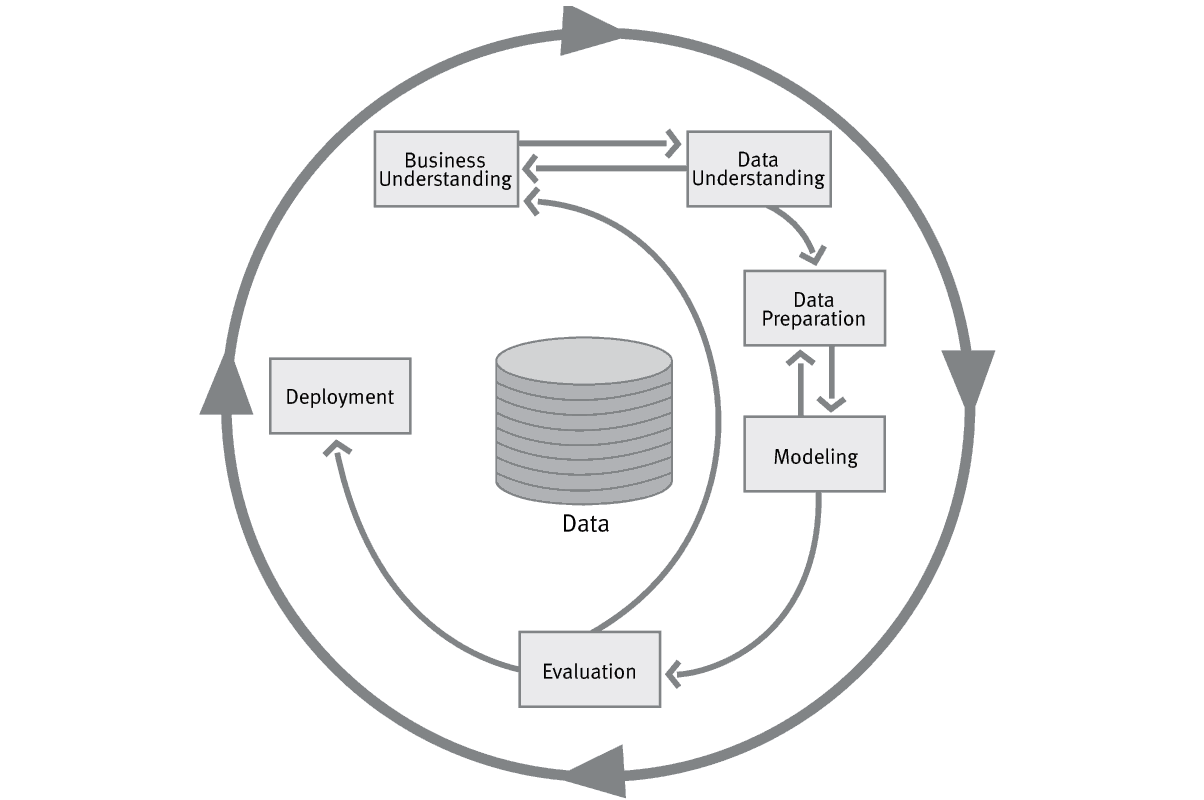

Im ersten Schritt wird eine Datenanalyse / Bereinigung durchgeführt - also welche NA-Werte sind im Datensatz vorhanden. Bei Numerischen werden diese dann durch den Mittelwert des jeweiligen Features ersetzt. Bei nicht numerischen Werten, wird der Modus eingesetzt. 


In [28]:
 df_train.drop(columns=['transactionId']) #Spalte mit Transaction ID rauswerden - ist eine fortlaufende Nummer mit der wir so nichts anfangen können. 
 
 df_train["totalAmount"].isna().sum() # Gibt es NAN Werte in total Amount?  
 df_train["customerType"].isna().sum() #

134

In [36]:
percent_missing = df_train.isnull().sum() * 100 / len(df_train)  # Ermittel pro Spalte, wie viel % der Daten fehlen dafür zähle pro Spalte die fehlenden Werte multipliziere diese mit 100 und teile diese dann durch die Gesamtlänge -> erste Analyse 
missing_value_df = pd.DataFrame({'column_name': df_train.columns,
                                 'percent_missing': percent_missing})

missing_value_df # Neuer Dataframe 

,column_name,percent_missing
transactionId,transactionId,0.000000
basket,basket,0.000000
customerType,customerType,2.066667
totalAmount,totalAmount,2.233333
returnLabel,returnLabel,0.000000


Fehlende Datenwerte ersetzen im Fall von CustomerType nehmen wir den Modus, da es sich um ein nominales Feature handelt. 

Im Fall von totalAmount wird der Durschnitt genommen -> da rational 

In [45]:
import statistics
statistics.mode(df_train["customerType"]) #Sind beide gleich 
df_train["customerType"].mode()           

0    existing
dtype: object

Ausprobieren von einfachen Visualisierungen

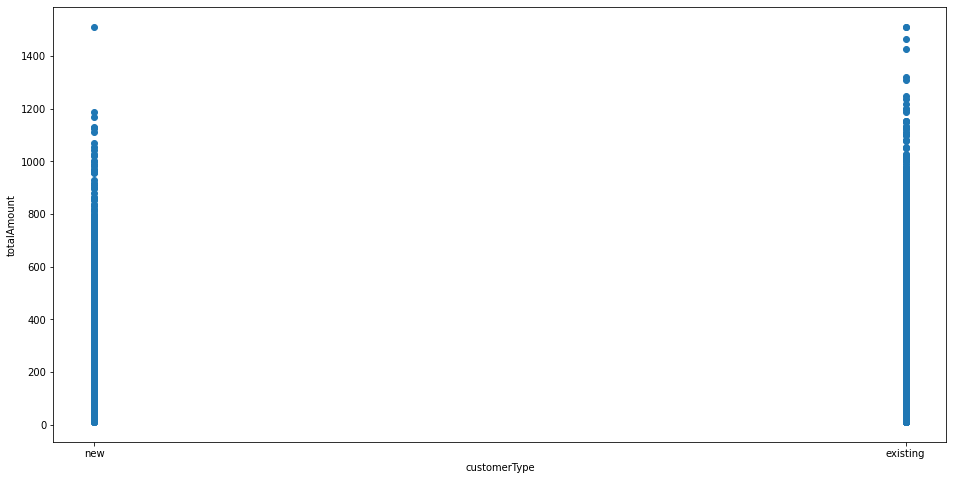

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
plt.scatter(df_train['customerType'], df_train['totalAmount'])
plt.xlabel("customerType")
plt.ylabel("totalAmount")
plt.show()